## Car Price Prediction - Linear Regression Assignment 

The solution has the following sections: 
- Data understanding and exploration
- Data cleaning
- Data Visualization
- Data preparation
- Model building and evaluation



#### Step 1: Reading and Understanding the Data


- Importing data using the pandas library
- Understanding the structure of the data


In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Let's take a look at the first few rows
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
cars.shape

(205, 26)

In [5]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Understanding the Data Dictionary

In [7]:
# Symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
# Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
# pressure) or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [9]:
# Drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

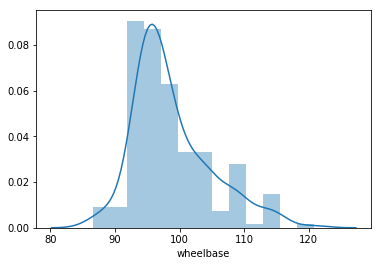

In [10]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

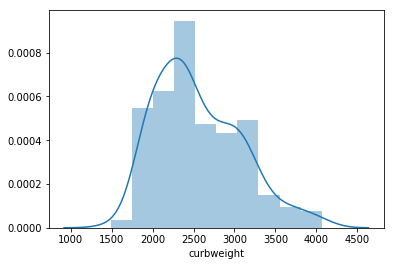

In [11]:
# Curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

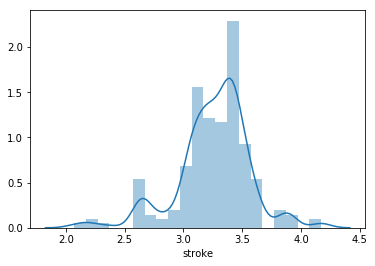

In [12]:
# Stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

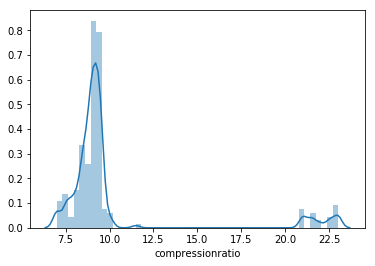

In [13]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

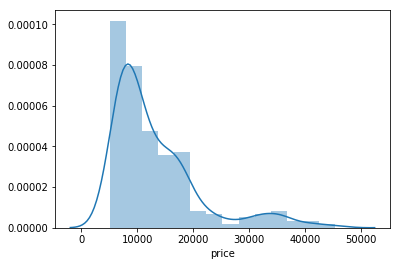

In [14]:
# Target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*.

In [15]:
# All numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

`car_ID` isn't of any use to building a linear regression model. Hence, we drop it.

In [16]:
# Dropping car_ID 
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

<Figure size 1440x720 with 0 Axes>

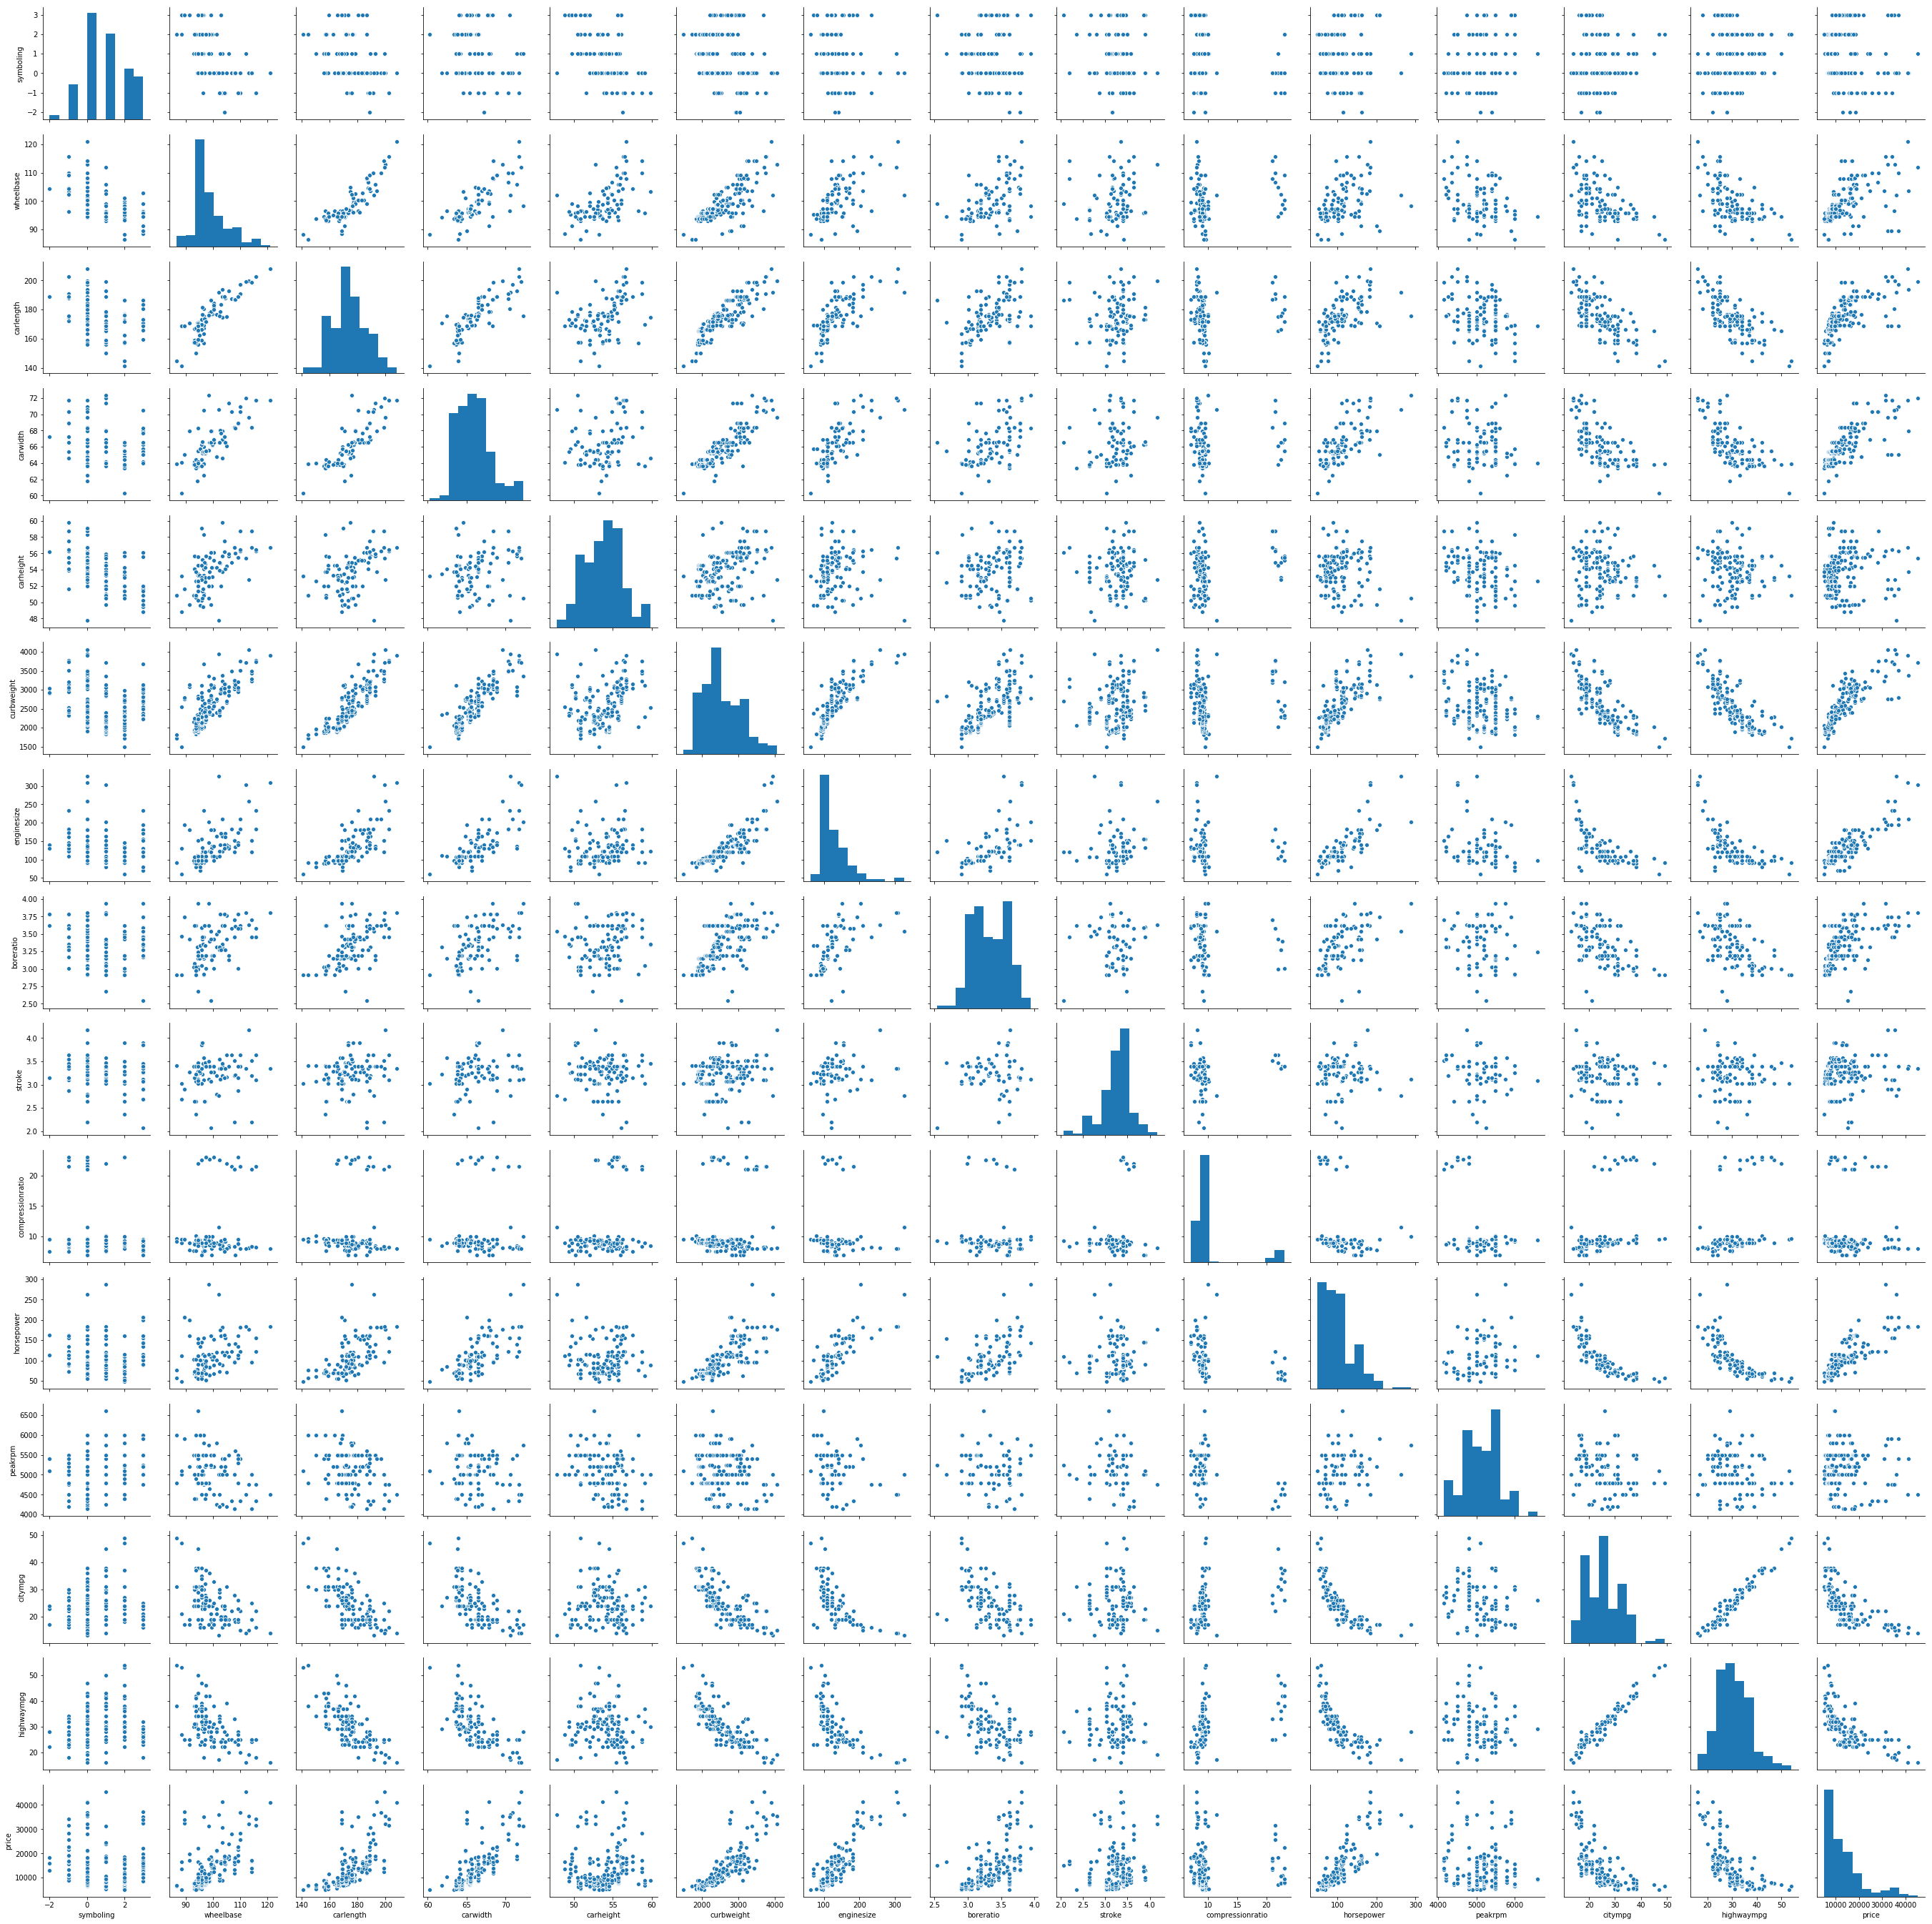

In [17]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [18]:
# Correlation matrix
cor = cars_numeric.corr()
cor

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

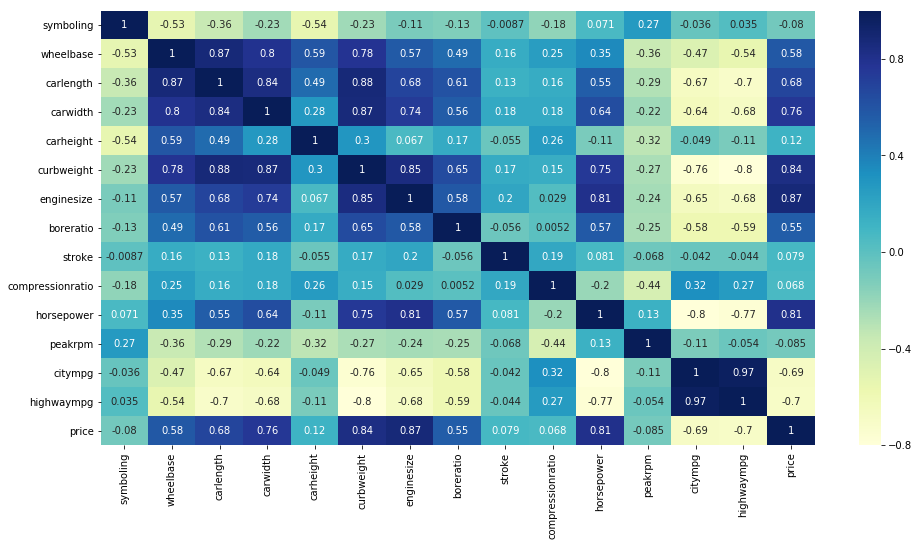

In [19]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful **Insights:**

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we have to pay attention to multicollinearity.

#### Step 2 : Data Cleaning and Preparation

In [20]:
# Variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [21]:
# extract the company name from the column CarName.
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

The car name is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space.

In [22]:
# Extracting carname

# Method: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [23]:
cars.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [24]:
cars['brand'] = cars.CarName.str.split(' ').str.get(0).str.upper()

In [25]:
len(set(cars.brand.values))

27

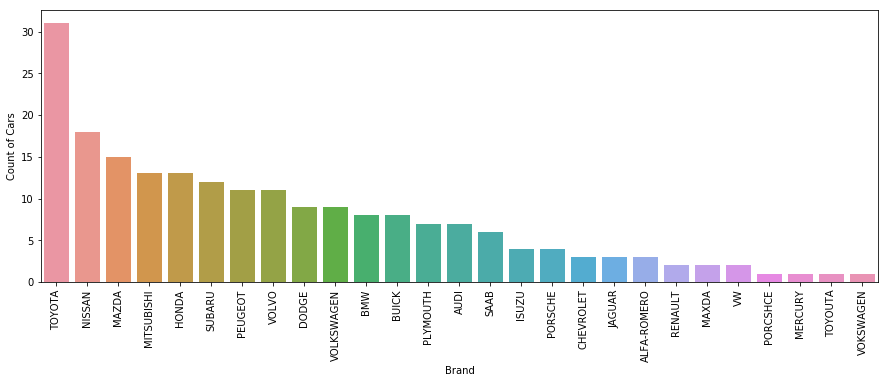

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(cars['brand'], order=pd.value_counts(cars['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [27]:
# Create a new column named car_company
import re
p = re.compile(r'\w+-?\w+')
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [28]:
# Look at all values since this column will be used as a categorical variable
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

#### Fixing invalid values
There seems to be some spelling error in the CarName column.

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [29]:
# Replacing the misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [30]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

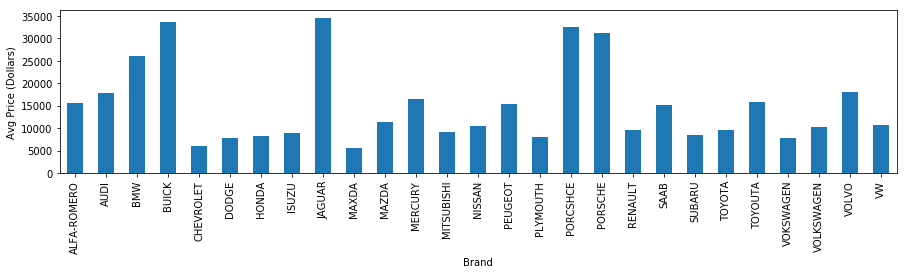

In [31]:
cars_comp_avg_price = cars[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = cars_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

#### Inference:
- Toyota has considerably high no of models in the market.
- Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.

#### Step 3: Visualizing the data

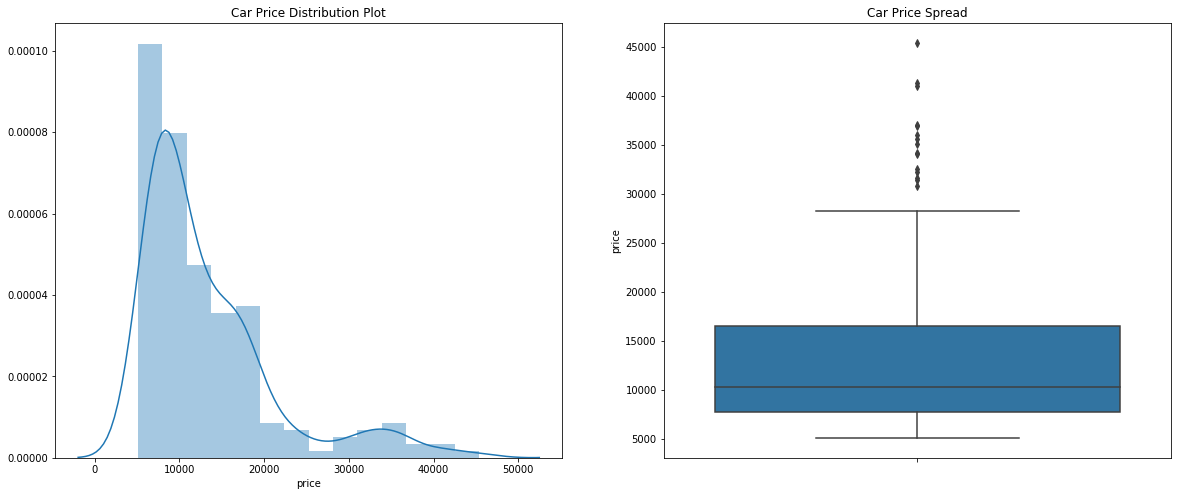

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [33]:
cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

#### Inference :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

###### Step 3.1 : Visualising Categorical Data
- CarName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car company')]

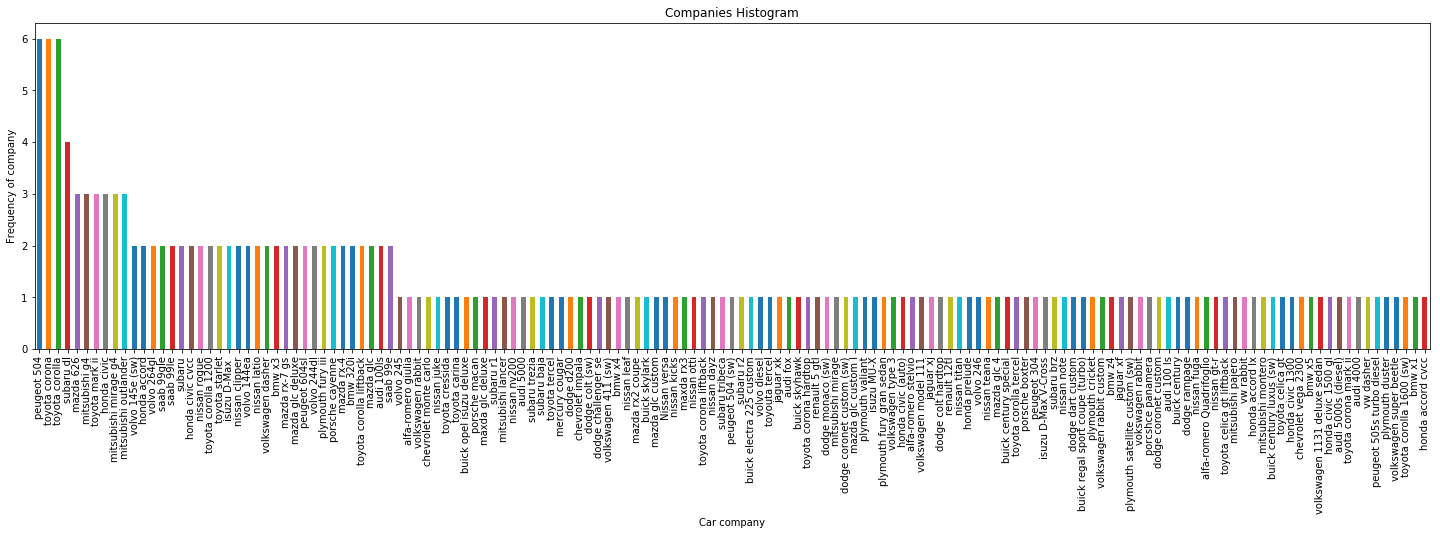

In [34]:
plt.figure(figsize=(25, 6))

#plt.subplot(1,3,1) cars['car_company']
plt1 = cars.CarName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')



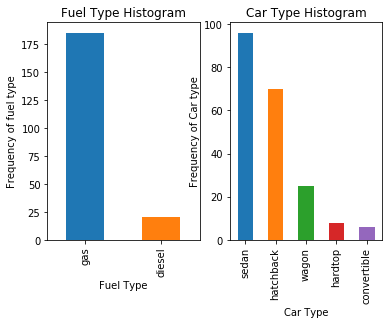

In [35]:
plt.subplot(1,2,1)
plt1 = cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = cars.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

##### Inference :
- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- sedan is the top car type prefered.

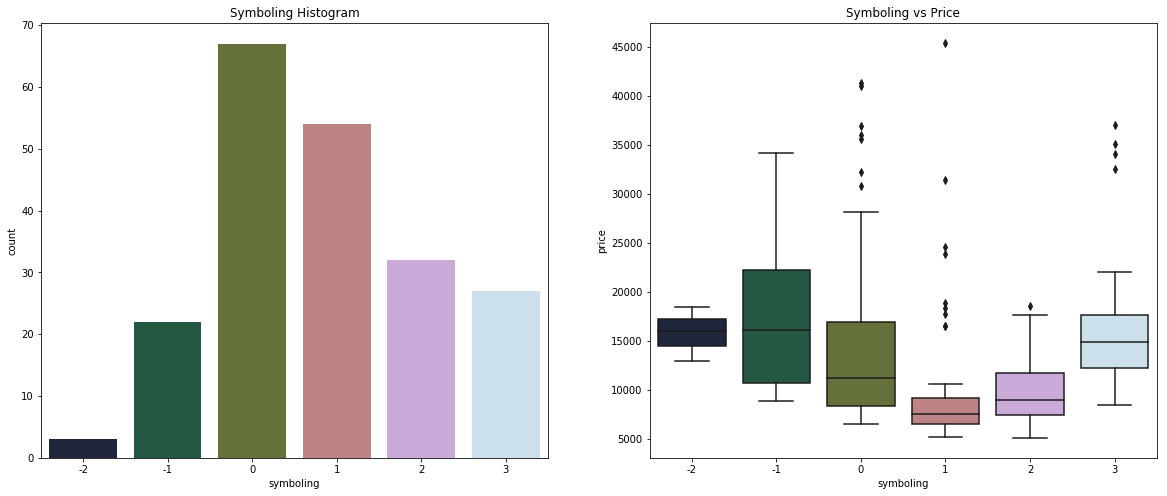

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

##### Inference :
- It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

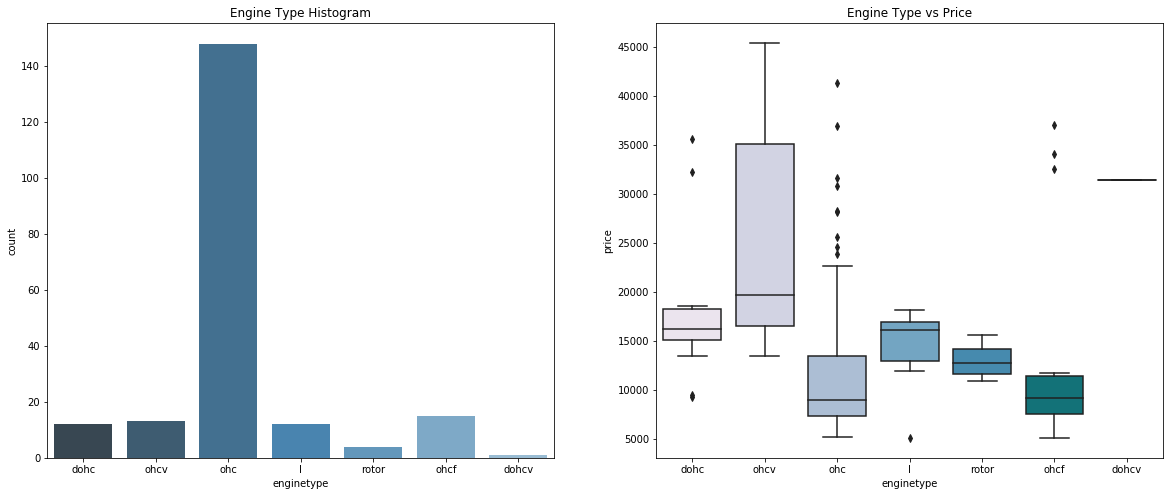

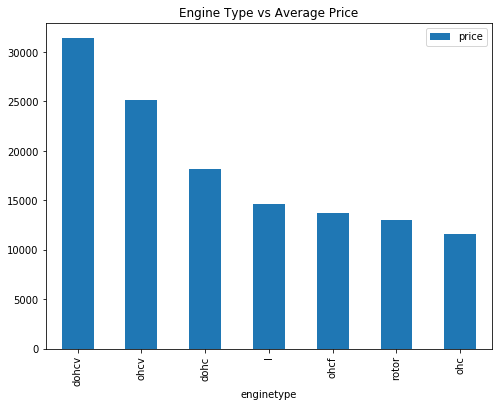

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

##### Inference :
- ohc Engine type seems to be most favored type.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 7200x72 with 0 Axes>

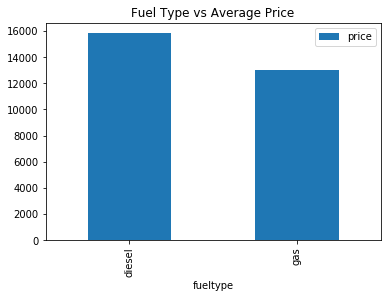

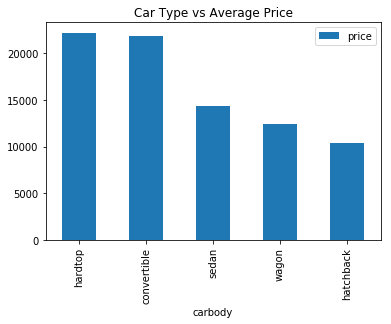

In [38]:
plt.figure(figsize=(100, 1))

# df = pd.DataFrame(cars.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
# df.plot.bar()
# plt.title('Car Name vs Average Price')
# plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

##### Inference :
- Diesel has higher average price than gas.
- hardtop and convertible have higher average price.

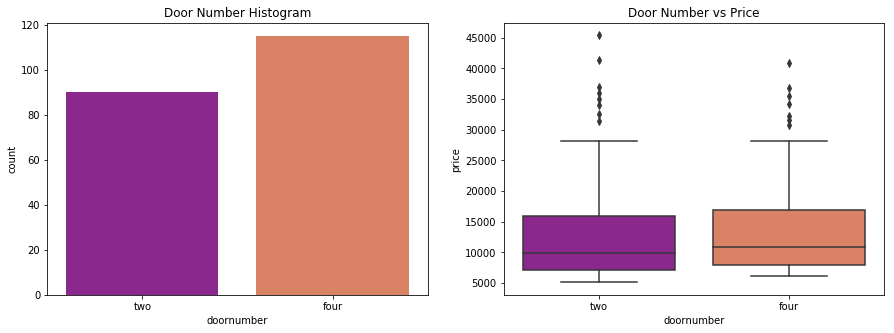

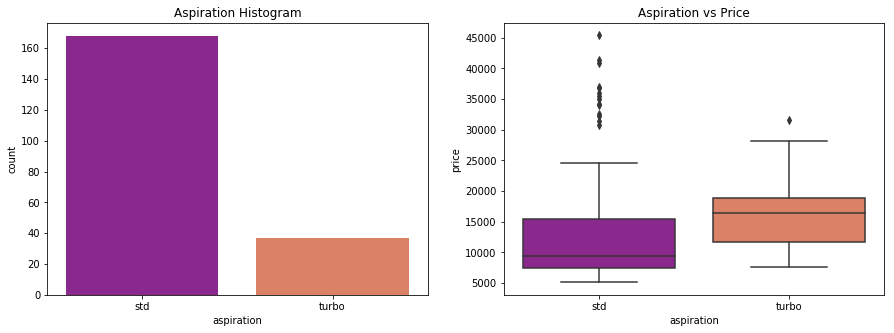

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

##### Inference :
- doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

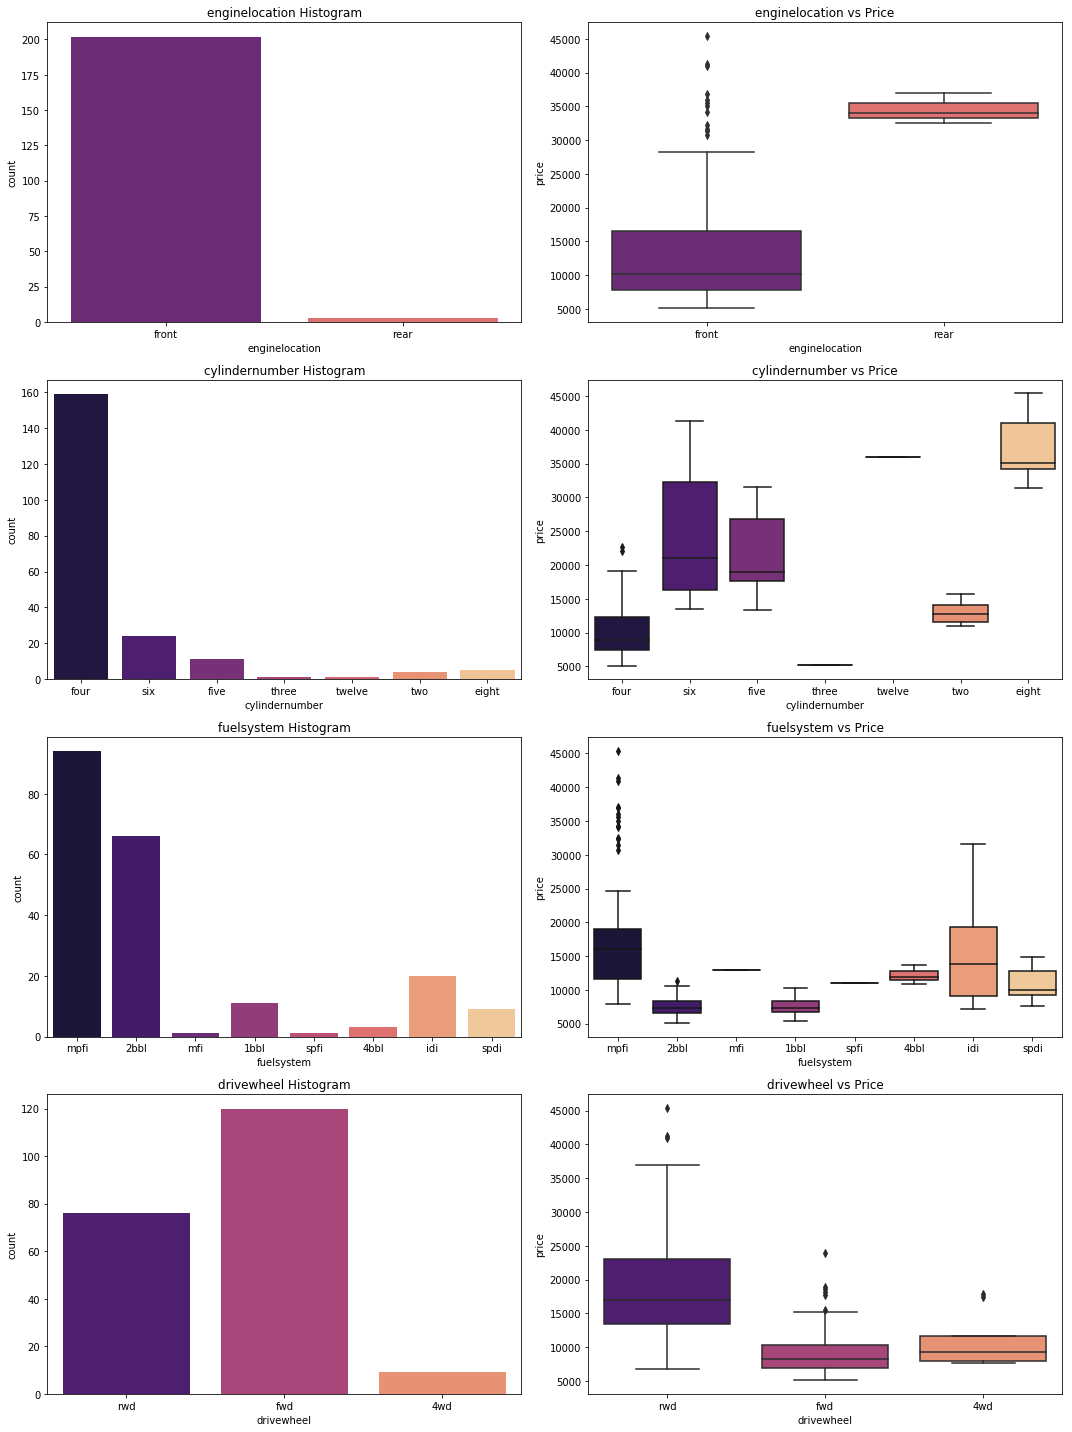

In [40]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

##### Inference :
- Very few datapoints for enginelocation categories to make an inference.
- Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
- mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

##### Step 3.2 : Visualising numerical data

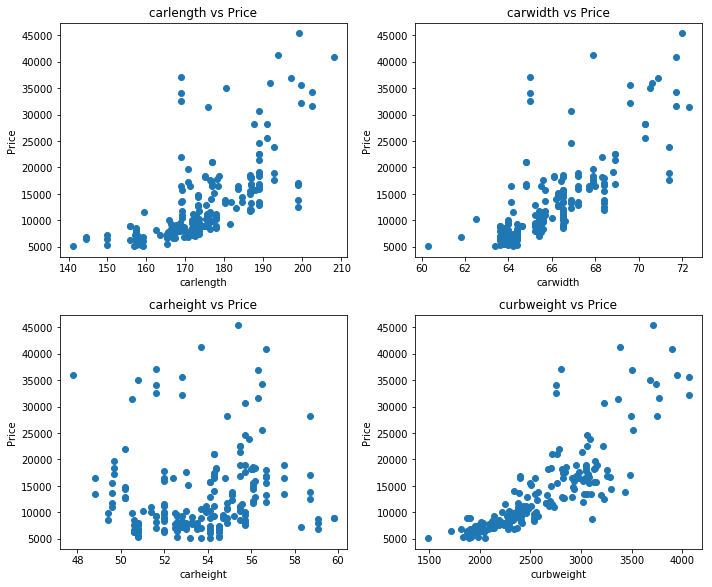

In [41]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

##### Inference :
- carwidth, carlength and curbweight seems to have a poitive correlation with price.
- carheight doesn't show any significant trend with price.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


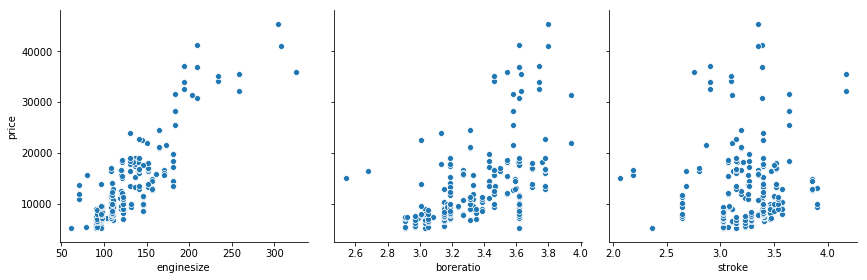

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


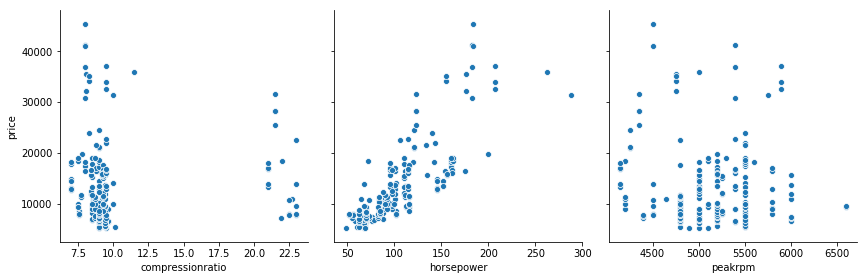

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


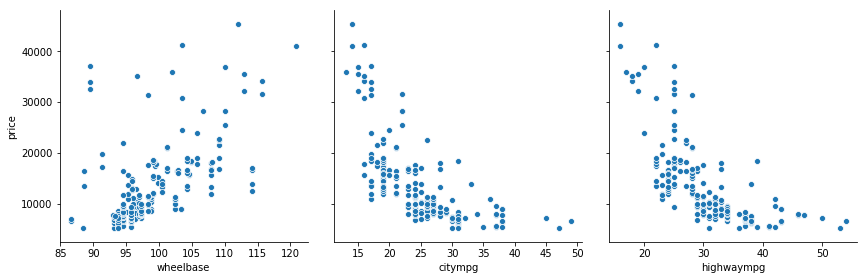

In [42]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

##### Inference :
- enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.

In [43]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

####  Data Preparation 


In [44]:
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase     ...       boreratio  \
0  convertible        rwd          front       88.6     ...            3.47   
1  convertible        rwd          front       88.6     ...            3.47   
2    hatchback        rwd          front       94.5     ...            2.68   
3        sedan        fwd          front       99.8     ...            3.19   
4        sedan        4wd          front       99.4     ...            3.19   

   stroke  compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0    2.68               9.0         111    5000      21          27  13495.0   
1    2.68               9.0         111    5000      21          27  16500.0   
2    3.47               9.0         154    5000      19          26  16500.0   
3    3.40              10.0         102    5500      24          30  13950.0   
4    3.40               8.0         115    5500      18          22  17450.0   

         brand  car_company  
0  ALFA-ROMERO  alfa-romero  
1  ALFA-ROMERO  alfa-romero  
2  ALFA-ROMERO  alfa-romero  
3         AUDI         audi  
4         AUDI         audi  

[5 rows x 28 columns]

In [45]:
# Let's check for any outliers
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

- Two of the variables - doornumber and cylindernumber are numeric types with the numbers written as words. Map these to actual numbers to avoid too many dummy variable creations ahead.

In [46]:
# Checking the different levels of 'cylindernumber'
cars['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [47]:
# Checking the different levels of 'doornumber'
cars['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

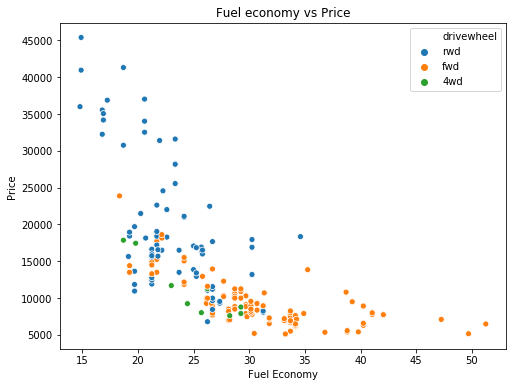

<Figure size 432x288 with 0 Axes>

In [48]:
#Deriving new feature- Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])


plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

##### Inference :
- fueleconomy has an obvios negative correlation with price and is significant.

In [49]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CarName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase    ...      \
0  convertible        rwd          front       88.6    ...       
1  convertible        rwd          front       88.6    ...       
2    hatchback        rwd          front       94.5    ...       
3        sedan        fwd          front       99.8    ...       
4        sedan        4wd          front       99.4    ...       

   compressionratio  horsepower  peakrpm  citympg highwaympg  price  \
0               9.0         111     5000       21         27  13495   
1               9.0         111     5000       21         27  16500   
2               9.0         154     5000       19         26  16500   
3              10.0         102     5500       24         30  13950   
4               8.0         115     5500       18         22  17450   

         brand  car_company  fueleconomy  carsrange  
0  ALFA-ROMERO  alfa-romero        23.70     Medium  
1  ALFA-ROMERO  alfa-romero        23.70     Medium  
2  ALFA-ROMERO  alfa-romero        22.15     Medium  
3         AUDI         audi        26.70     Medium  
4         AUDI         audi        19.80     Medium  

[5 rows x 30 columns]

<Figure size 1800x432 with 0 Axes>

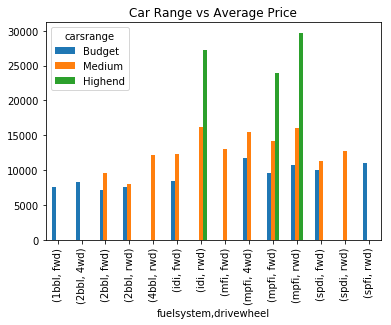

In [50]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

##### Inference :
- High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [51]:
cars_lnr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lnr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

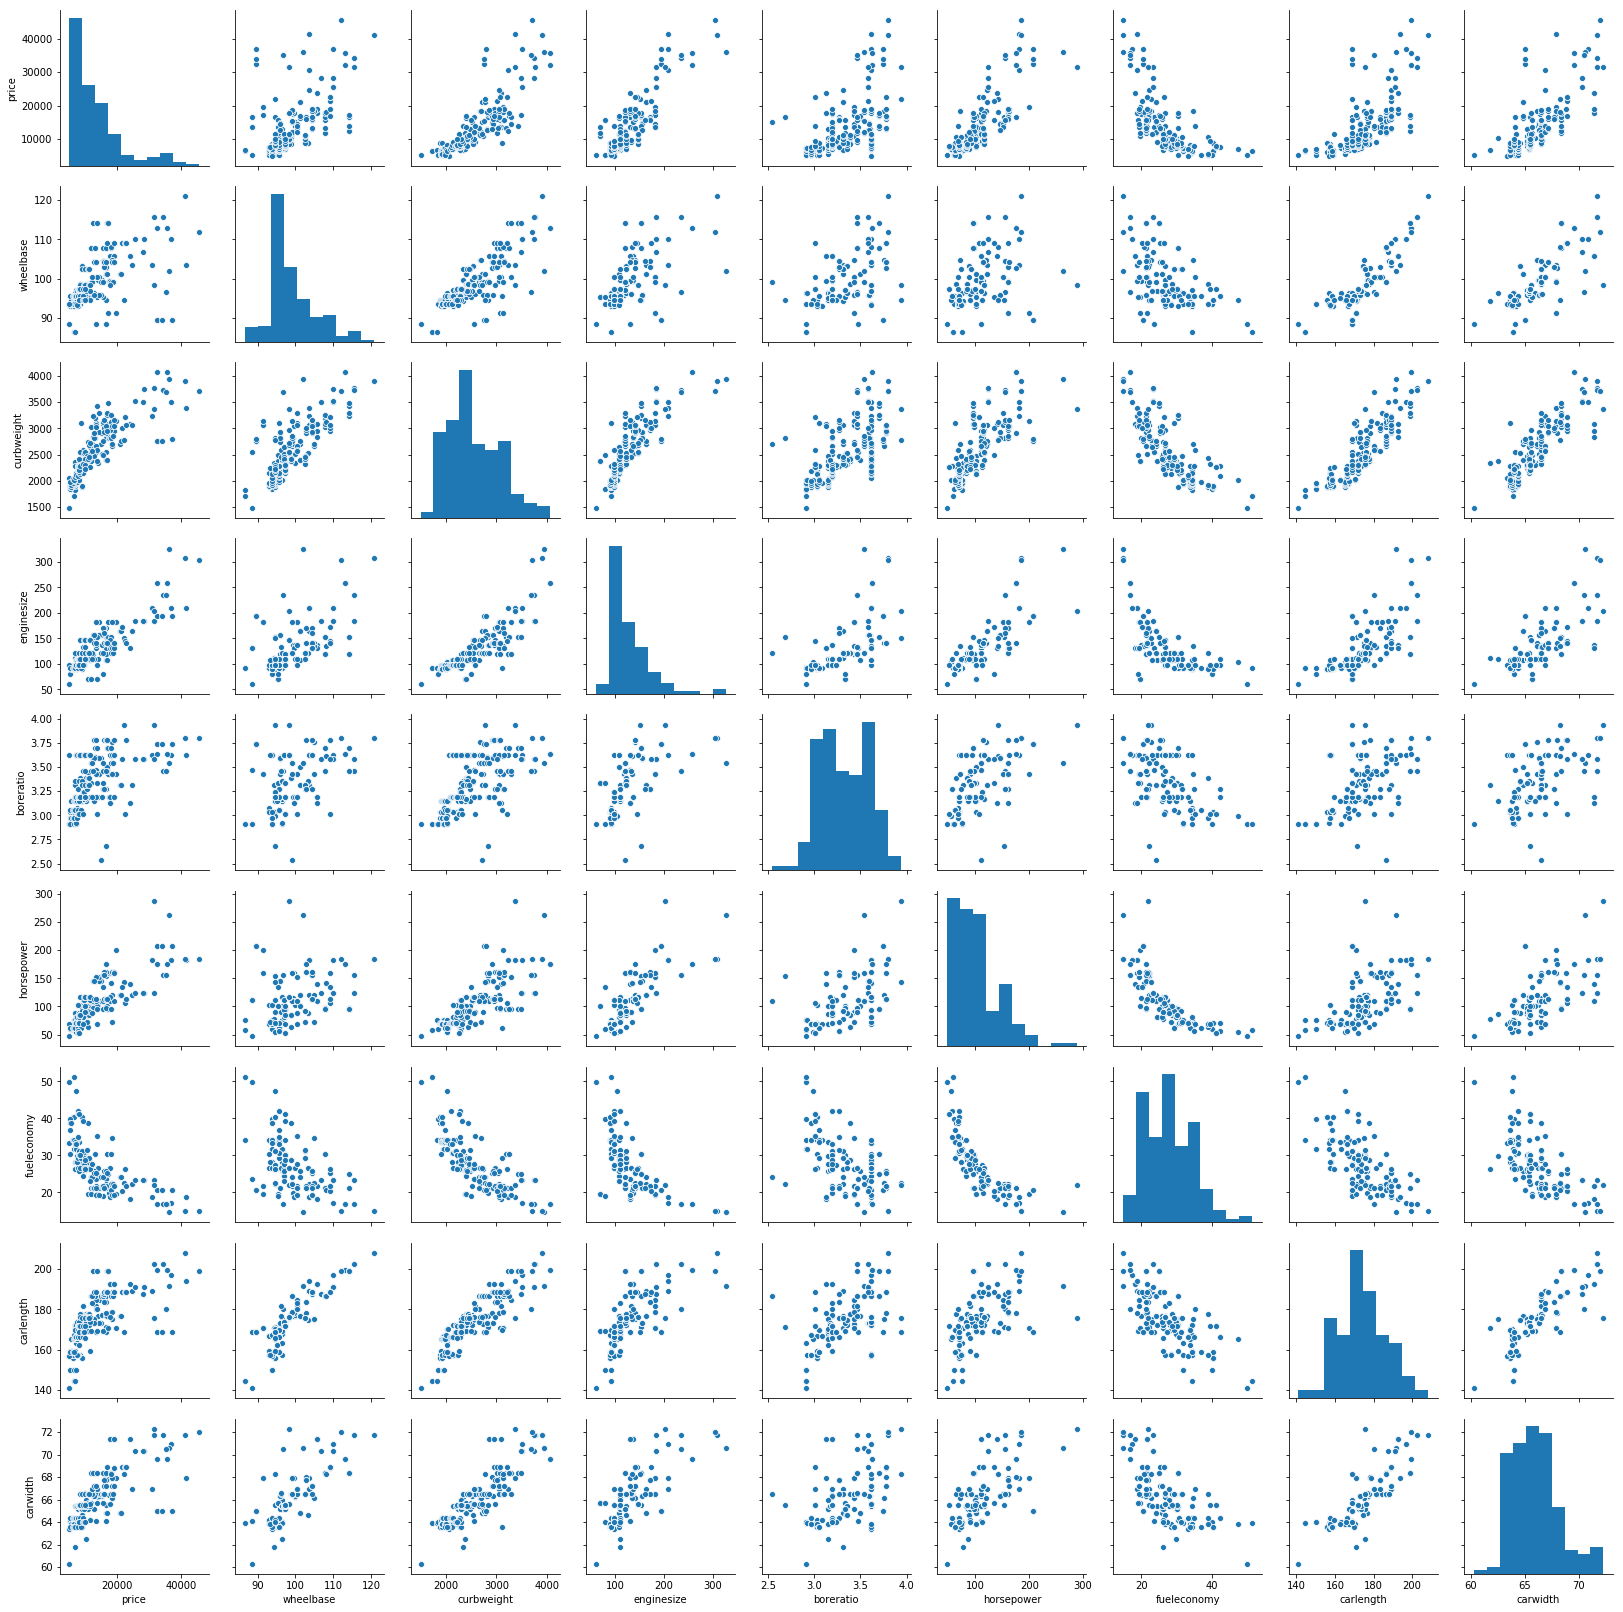

In [52]:
sns.pairplot(cars_lnr)
plt.show()

- Create **Dummy Variables** for the categorical variables

In [53]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lnr

cars_lnr = dummies('fueltype',cars_lnr)
cars_lnr = dummies('aspiration',cars_lnr)
cars_lnr = dummies('carbody',cars_lnr)
cars_lnr = dummies('drivewheel',cars_lnr)
cars_lnr = dummies('enginetype',cars_lnr)
cars_lnr = dummies('cylindernumber',cars_lnr)
cars_lnr = dummies('carsrange',cars_lnr)

In [54]:
cars_lnr.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  gas   ...     ohcv  rotor  five  four  \
0        23.70      168.8      64.1    1   ...        0      0     0     1   
1        23.70      168.8      64.1    1   ...        0      0     0     1   
2        22.15      171.2      65.5    1   ...        1      0     0     0   
3        26.70      176.6      66.2    1   ...        0      0     0     1   
4        19.80      176.6      66.4    1   ...        0      0     1     0   

   six  three  twelve  two  Medium  Highend  
0    0      0       0    0       1        0  
1    0      0       0    0       1        0  
2    1      0       0    0       1        0  
3    0      0       0    0       1        0  
4    0      0       0    0       1        0  

[5 rows x 31 columns]

In [55]:
cars_lnr.shape

(205, 31)

#### Step 4: Model Building and Evaluation

###### Step 4.1: Train-Test Split and feature scaling

In [56]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lnr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     fueleconomy  carlength  carwidth  gas   ...     ohcv  rotor  five  four  \
122     0.530864   0.426016  0.291667    1   ...        0      0     0     1   
125     0.213992   0.452033  0.666667    1   ...        0      0     0     1   
166     0.344307   0.448780  0.308333    1   ...        0      0     0     1   
1       0.244170   0.450407  0.316667    1   ...        0      0     0     1   
199     0.122085   0.775610  0.575000    1   ...        0      0     0     1   

     six  three  twelve  two  Medium  Highend  
122    0      0       0    0       0        0  
125    0      0       0    0       0        1  
166    0      0       0    0       0        0  
1      0      0       0    0       1        0  
199    0      0       0    0       1        0  

[5 rows x 31 columns]

In [59]:
df_train.describe()

price   wheelbase  curbweight  enginesize   boreratio  horsepower  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.219309    0.411141    0.407878    0.241351    0.497946    0.227302   
std      0.215682    0.205581    0.211269    0.154619    0.207140    0.165511   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067298    0.272414    0.245539    0.135849    0.305556    0.091667   
50%      0.140343    0.341379    0.355702    0.184906    0.500000    0.191667   
75%      0.313479    0.503448    0.559542    0.301887    0.682540    0.283333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       fueleconomy   carlength    carwidth         gas     ...      \
count   143.000000  143.000000  143.000000  143.000000     ...       
mean      0.358265    0.525476    0.461655    0.909091     ...       
std       0.185980    0.204848    0.184517    0.288490     ...       
min       0.000000    0.000000    0.000000    0.000000     ...       
25%       0.198903    0.399187    0.304167    1.000000     ...       
50%       0.344307    0.502439    0.425000    1.000000     ...       
75%       0.512346    0.669919    0.550000    1.000000     ...       
max       1.000000    1.000000    1.000000    1.000000     ...       

             ohcv       rotor        five        four         six       three  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.062937    0.027972    0.062937    0.741259    0.132867    0.006993   
std      0.243703    0.165472    0.243703    0.439483    0.340624    0.083624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           twelve         two      Medium     Highend  
count  143.000000  143.000000  143.000000  143.000000  
mean     0.006993    0.027972    0.342657    0.125874  
std      0.083624    0.165472    0.476266    0.332873  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 31 columns]

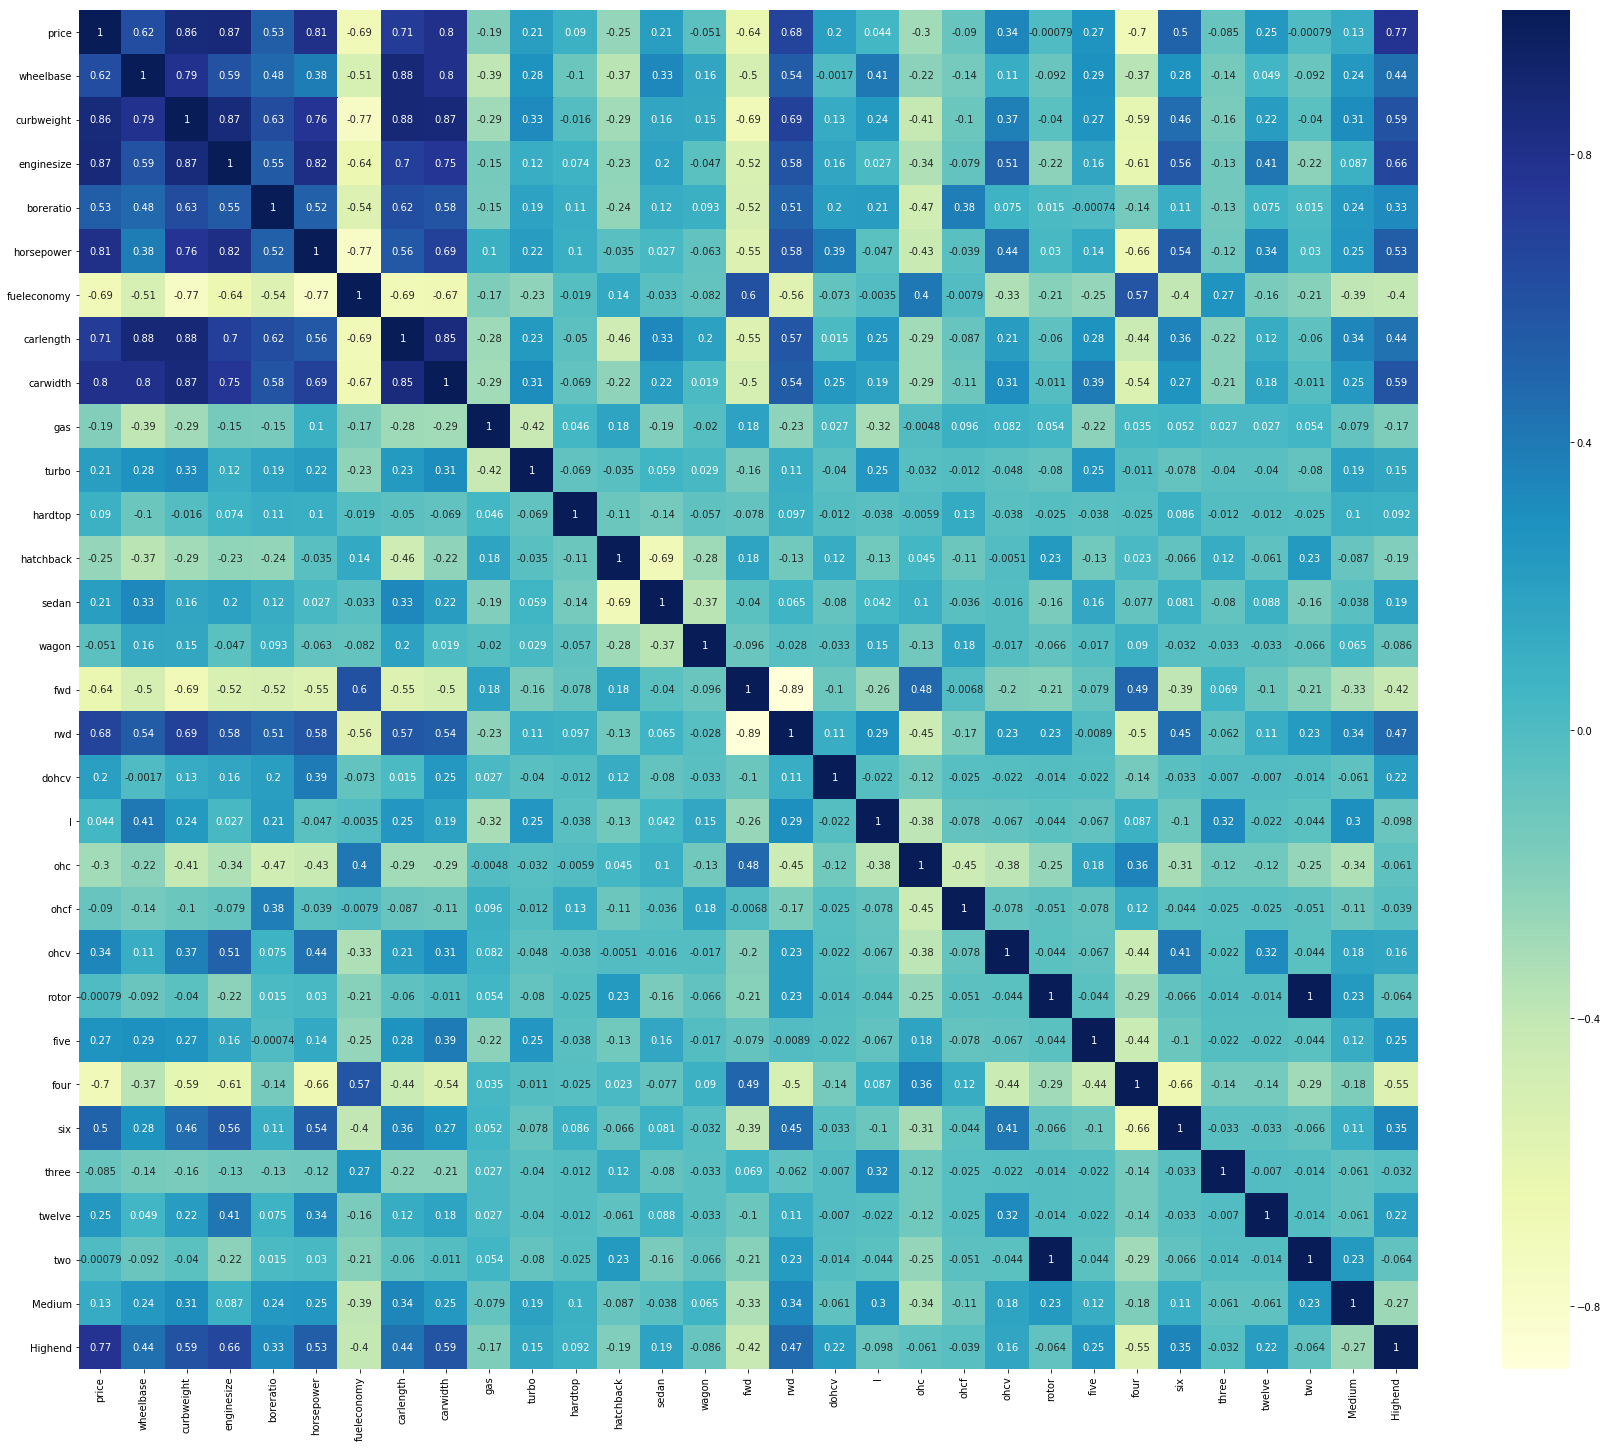

In [60]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [61]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

##### Step 4.2 : Model Building

In [62]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 17),
 ('carwidth', False, 14),
 ('gas', False, 9),
 ('turbo', False, 10),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 19),
 ('dohcv', True, 1),
 ('l', False, 8),
 ('ohc', False, 6),
 ('ohcf', False, 7),
 ('ohcv', False, 18),
 ('rotor', False, 12),
 ('five', False, 5),
 ('four', False, 3),
 ('six', False, 4),
 ('three', False, 20),
 ('twelve', True, 1),
 ('two', False, 16),
 ('Medium', False, 21),
 ('Highend', True, 1)]

In [65]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [66]:
#Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

wheelbase  curbweight  horsepower  fueleconomy  hatchback  sedan  wagon  \
122   0.244828    0.272692    0.083333     0.530864          0      1      0   
125   0.272414    0.500388    0.395833     0.213992          1      0      0   
166   0.272414    0.314973    0.266667     0.344307          1      0      0   
1     0.068966    0.411171    0.262500     0.244170          0      0      0   
199   0.610345    0.647401    0.475000     0.122085          0      0      1   

     dohcv  twelve  Highend  
122      0       0        0  
125      0       0        1  
166      0       0        0  
1        0       0        0  
199      0       0        0

In [67]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [68]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           3.68e-61
Time:                        08:38:35   Log-Likelihood:                 182.13
No. Observations:                 143   AIC:                            -342.3
Df Residuals:                     132   BIC:                            -309.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0757      0.049     -1.553      

- p-value of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [69]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### MODEL 2

In [70]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     131.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           8.47e-62
Time:                        08:38:42   Log-Likelihood:                 181.03
No. Observations:                 143   AIC:                            -342.1
Df Residuals:                     133   BIC:                            -312.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0585      0.047     -1.234      

In [71]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [72]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     146.4
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.31e-62
Time:                        08:38:46   Log-Likelihood:                 179.70
No. Observations:                 143   AIC:                            -341.4
Df Residuals:                     134   BIC:                            -314.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.031     -0.043      0.9

In [73]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0       const  26.79
2  curbweight  10.20
5       sedan   7.22
4   hatchback   6.20
1   wheelbase   4.98
3  horsepower   4.73
6       wagon   3.98
8     Highend   1.68
7       dohcv   1.35

- dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [74]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4

In [75]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     152.4
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           7.35e-61
Time:                        08:38:52   Log-Likelihood:                 173.26
No. Observations:                 143   AIC:                            -330.5
Df Residuals:                     135   BIC:                            -306.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0281      0.031      0.908      0.3

In [76]:
checkVIF(X_train_new)

Features    VIF
0       const  24.86
4       sedan   6.73
3   hatchback   5.76
5       wagon   3.96
1   wheelbase   1.83
2  horsepower   1.76
7     Highend   1.62
6       dohcv   1.26

- dropping sedan because of high VIF value.

In [77]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 5

In [78]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     164.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           7.19e-60
Time:                        08:38:58   Log-Likelihood:                 168.06
No. Observations:                 143   AIC:                            -322.1
Df Residuals:                     136   BIC:                            -301.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0515      0.019     -2.735      0.0

In [79]:
checkVIF(X_train_new)

Features   VIF
0       const  8.65
2  horsepower  1.69
6     Highend  1.59
1   wheelbase  1.55
3   hatchback  1.28
5       dohcv  1.24
4       wagon  1.14

In [80]:
#dropping wagon because of high p-value.
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### MODEL 6

In [81]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     196.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.32e-60
Time:                        08:39:02   Log-Likelihood:                 167.01
No. Observations:                 143   AIC:                            -322.0
Df Residuals:                     137   BIC:                            -304.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0553      0.019     -2.953      0.0

In [82]:
checkVIF(X_train_new)

Features   VIF
0       const  8.48
2  horsepower  1.68
5     Highend  1.55
1   wheelbase  1.51
4       dohcv  1.24
3   hatchback  1.20

#### Inference :
- All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.89` with **11 variables** to just `0.87` using **6 variables**.

##### Step 4.3 : Residual Analysis of Model

In [83]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

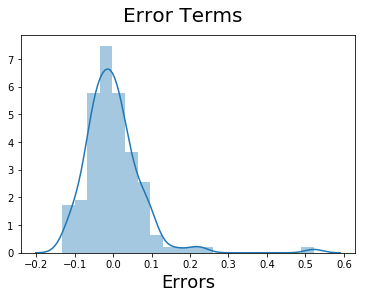

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

##### Inference:
- Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

##### Step 4.4 : Prediction and Evaluation

In [85]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [86]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [87]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lm.predict(X_test_new)

- Evaluation of test via comparison of y_pred and y_test

In [89]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5036362323658561

Text(0, 0.5, 'y_pred')

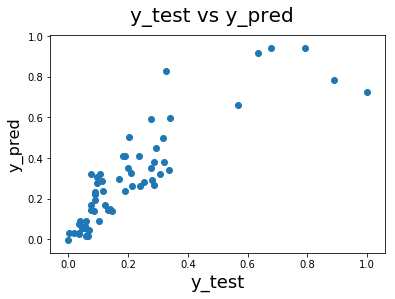

In [90]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

In [91]:
#Evaluation of the model using Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     196.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.32e-60
Time:                        08:40:19   Log-Likelihood:                 167.01
No. Observations:                 143   AIC:                            -322.0
Df Residuals:                     137   BIC:                            -304.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0553      0.019     -2.953      0.004      -0.092      -0.018
wheelbase      0.2210      0.039      5.729      0.000       0.145       0.297
horsepower     0.7246      0.051     14.328      0.000       0.625       0.825
hatchback     -0.0321      0.015     -2.165      0.032      -0.061      -0.003
dohcv         -0.2538      0.086     -2.955      0.004      -0.424      -0.084
Highend        0.2528      0.024     10.468      0.000       0.205       0.301
==============================================================================
Omnibus:                      113.814   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1519.070
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      18.058   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference :
- R-sqaured and Adjusted R-squared (extent of fit) - 0.877 and 0.873 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 196.1 and 1.32e-60(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.
- p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.